In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


In [2]:
result_dir = Path(os.getcwd())

proj_dir = result_dir.parent

os.chdir(proj_dir)

In [3]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [6]:
from utils.results import SimulationResults

RUNID = "val0"

test0_results = SimulationResults(runid=RUNID)

print(test0_results.var_list)
print(test0_results.timestep_output_ids)

FileNotFoundError: [Errno 2] No such file or directory: 'p:\\11210070-usgscoop-202324-arcticxb\\runs\\test3\\0.nc'

In [6]:
# test0_results.get_var_timeseries("cumulative_computational_time")[RUNID]

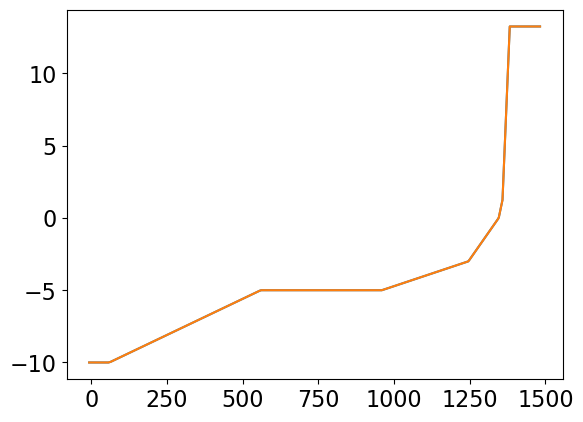

In [7]:
xgr0 = test0_results.get_var_timestep("xgr", 0)
zgr0 = test0_results.get_var_timestep("zgr", 0)

xgr_end = test0_results.get_var_timestep("xgr", 2207)
zgr_end = test0_results.get_var_timestep("zgr", 2207)

plt.plot(xgr0, zgr0, label='t=0')
plt.plot(xgr_end, zgr_end, label='t=1416')

So the bathymetry is not updating. What about temperature distribution?

In [9]:
abs_xgr0 = test0_results.get_var_timestep("abs_xgr", 0)
abs_zgr0 = test0_results.get_var_timestep("abs_zgr", 0)
ground_temperature_distribution0 = test0_results.get_var_timestep(
    "ground_temperature_distribution", 0) - 273.15

abs_xgr_end = test0_results.get_var_timestep("abs_xgr", 2207)
abs_zgr_end = test0_results.get_var_timestep("abs_zgr", 2207)
ground_temperature_distribution_end = test0_results.get_var_timestep(
    "ground_temperature_distribution", 2207) - 273.15

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_93568\1719406421.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


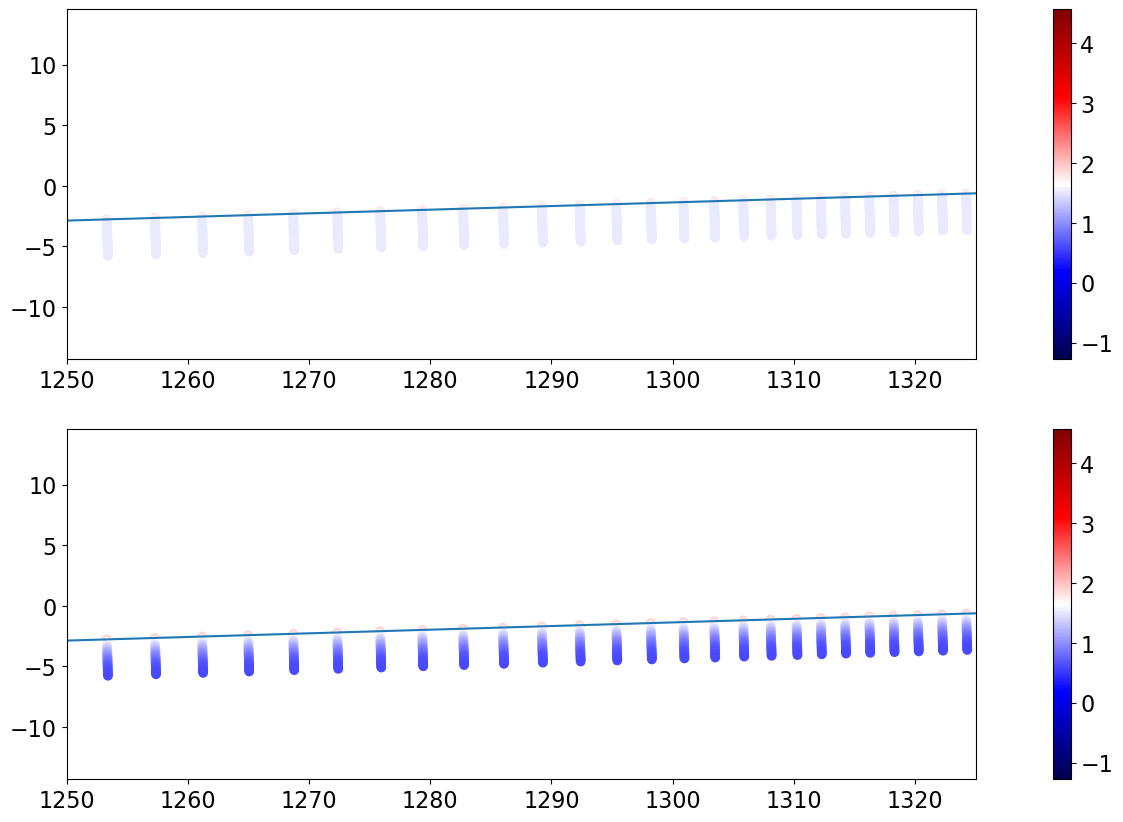

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(20,10))
ax1, ax2 = axs

vmin, vmax = -5, 5

norm=Normalize(vmin, vmax)

ax1.plot(xgr0, zgr0, label='bathymetry')
scatter1 = ax1.scatter(abs_xgr0.values.flatten(), abs_zgr0.values.flatten(), c=ground_temperature_distribution0.values.flatten(), cmap='seismic', norm=norm)
sm = ScalarMappable(cmap='seismic')
sm.set_array(ground_temperature_distribution0)
plt.colorbar(sm, ax=ax1)
ax1.set_aspect("equal")
ax1.set_xlim(1250, 1325)

ax2.plot(xgr_end, zgr_end, label='bathymetry')
scatter2 = ax2.scatter(abs_xgr_end.values.flatten(), abs_zgr_end.values.flatten(), c=ground_temperature_distribution_end.values.flatten(), cmap='seismic', norm=norm)
sm = ScalarMappable(cmap='seismic')
sm.set_array(ground_temperature_distribution0)
plt.colorbar(sm, ax=ax2, norm=norm)
ax2.set_aspect("equal")
ax2.set_xlim(1250, 1325)

fig.show()

In [23]:
# Something weird is happening with temperatures, as if they're inverse proportional to heat transport into the soil?
temp975 = (test0_results.get_var_timestep("ground_temperature_distribution", 975) - 273.15)[:,0]

print(temp975.shape)
print(temp975)

(332,)
<xarray.DataArray 'ground_temperature_distribution' (xgr: 332)> Size: 3kB
array([5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.23891304, 5.23891304,
       5.23891304, 5.23891304, 5.23891304, 5.238

In [27]:
tepm1500 = (test0_results.get_var_timestep("ground_temperature_distribution", 1500) - 273.15)[:,15]

print(tepm1500.shape)
print(tepm1500)

(332,)
<xarray.DataArray 'ground_temperature_distribution' (xgr: 332)> Size: 3kB
array([-2.72601542e+00, -2.72601542e+00, -2.72601542e+00, -2.72601542e+00,
       -2.72601542e+00, -2.72601542e+00, -2.72601542e+00, -2.72601542e+00,
       -2.72601542e+00, -2.72601551e+00, -2.72601604e+00, -2.72601638e+00,
       -2.72601638e+00, -2.72601638e+00, -2.72601638e+00, -2.72601638e+00,
       -2.72601638e+00, -2.72601638e+00, -2.72601638e+00, -2.72601638e+00,
       -2.72601638e+00, -2.72601638e+00, -2.72601638e+00, -2.72601638e+00,
       -2.72601638e+00, -2.72601638e+00, -2.72601638e+00, -2.72601638e+00,
       -2.72601638e+00, -2.72601638e+00, -2.72601638e+00, -2.72601638e+00,
       -2.72601638e+00, -2.72601638e+00, -2.72601638e+00, -2.72601638e+00,
       -2.72601638e+00, -2.72601638e+00, -2.72601638e+00, -2.72601638e+00,
       -2.72601638e+00, -2.72601638e+00, -2.72601638e+00, -2.72601638e+00,
       -2.72601638e+00, -2.72601638e+00, -2.72601638e+00, -2.72601638e+00,
       -2.72601638e

In [25]:
temp0 = (test0_results.get_var_timestep("ground_temperature_distribution", 0) - 273.15)[:,0]

print(temp0.shape)
print(temp0)

(332,)
<xarray.DataArray 'ground_temperature_distribution' (xgr: 332)> Size: 3kB
array([0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.31139707, 0.31139707,
       0.31139707, 0.31139707, 0.31139707, 0.311

In [24]:
temp1025 = (test0_results.get_var_timestep("ground_temperature_distribution", 1025) - 273.15)[:,0]

print(temp1025.shape)
print(temp1025)

(332,)
<xarray.DataArray 'ground_temperature_distribution' (xgr: 332)> Size: 3kB
array([5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.24979158, 5.24979158,
       5.24979158, 5.24979158, 5.24979158, 5.249

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_53984\1740549458.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


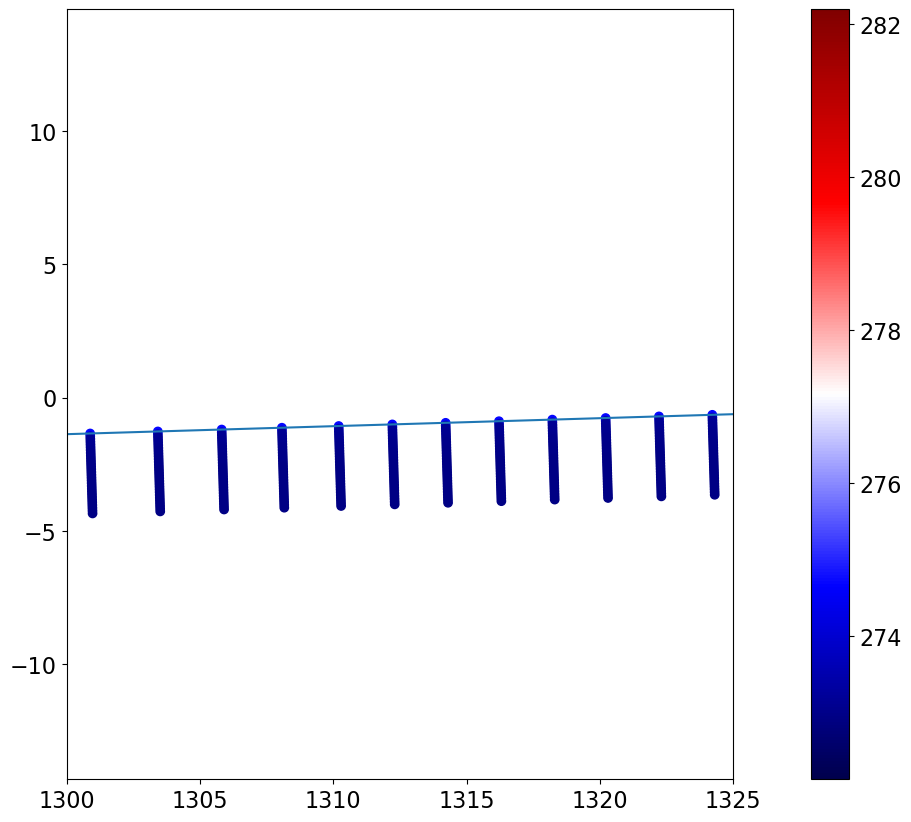

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(xgr0, zgr0, label='bathymetry')

scatter = ax.scatter(abs_xgr192, abs_zgr192, 
                     c=ground_temperature_distribution192, cmap='seismic')

sm = ScalarMappable(cmap='seismic')

sm.set_array(ground_temperature_distribution192)

plt.colorbar(sm, ax=ax)

ax.set_aspect("equal")

ax.set_xlim(1300, 1325)

fig.show()

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_53984\4024008093.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


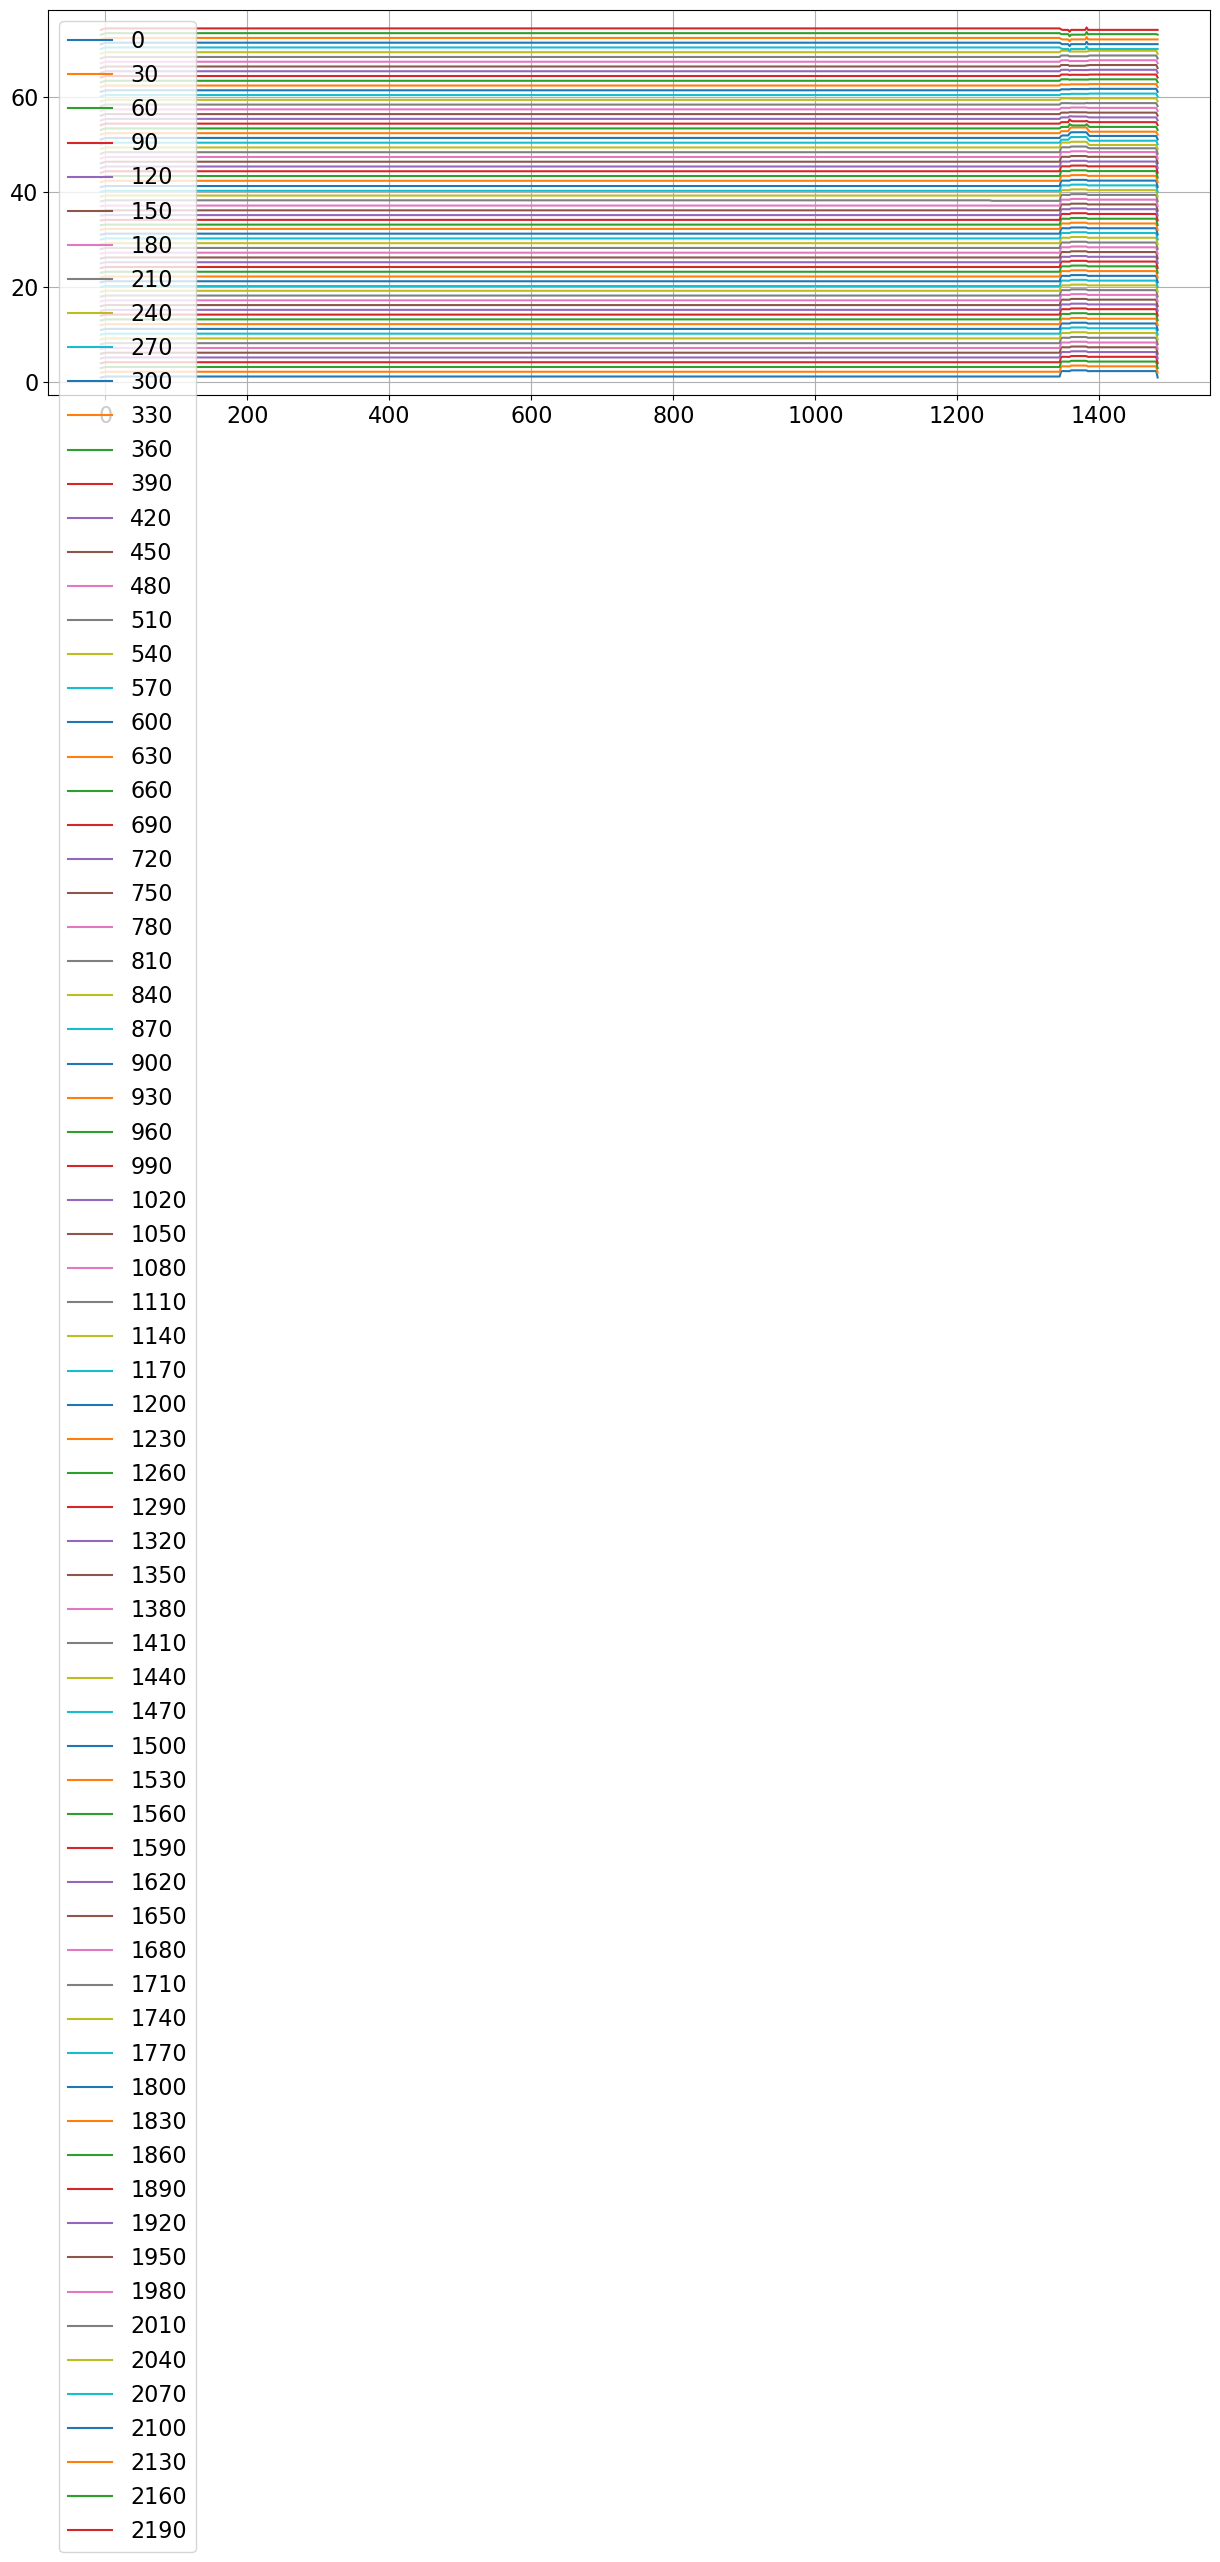

In [16]:
fig, ax = plt.subplots(figsize=(15,5))

i = 0

for t in np.array(test0_results.timestep_output_ids)[::30]:
    
    i += 1

    xgr = test0_results.get_var_timestep('xgr', t)[RUNID]
    zgr = test0_results.get_var_timestep('zgr', t)[RUNID]
    thaw_depth = test0_results.get_var_timestep('thaw_depth', t)[RUNID] + i
    
    ax.plot(xgr, thaw_depth, label=t)
     
        
ax.legend()
ax.grid()

# ax.set_xlim((1275, 1300))

fig.show()

In [17]:
t = test0_results.timestep_output_ids
comp_time = test0_results.get_var_timeseries("cumulative_computational_time")[RUNID]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_53984\418360138.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


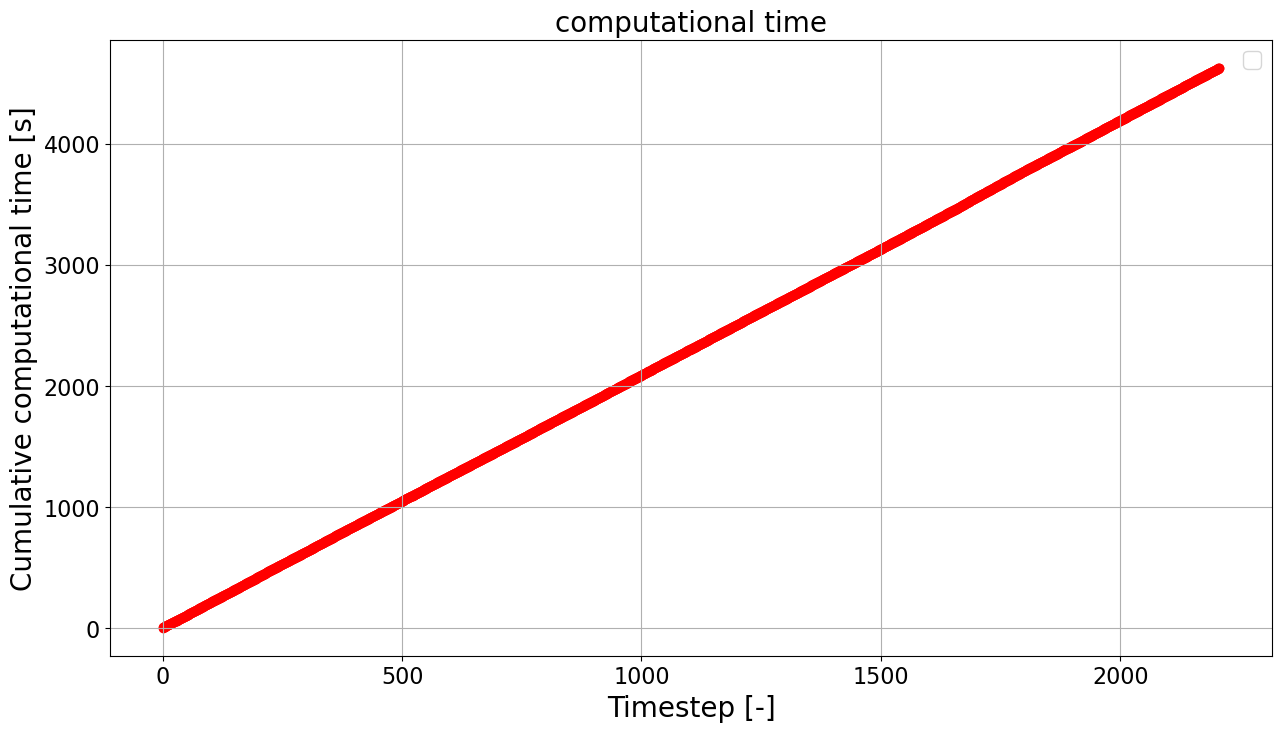

In [18]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(t, comp_time, c='r')

ax.set_xlabel("Timestep [-]")
ax.set_ylabel("Cumulative computational time [s]")

ax.grid()
ax.legend()

ax.set_title('computational time')

fig.show()

figname="computational_time_test0.png"

plt.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

In [20]:
xgr0 = test0_results.get_var_timestep("xgr", 0)[RUNID]
zgr0 = test0_results.get_var_timestep("zgr", 0)[RUNID]

id = test0_results.timestep_output_ids[-1]

xgr_end = test0_results.get_var_timestep("xgr", id)[RUNID]
zgr_end = test0_results.get_var_timestep("zgr", id)[RUNID]

Text(0.5, 1.0, '01/01/2020 - 31/12/2021')

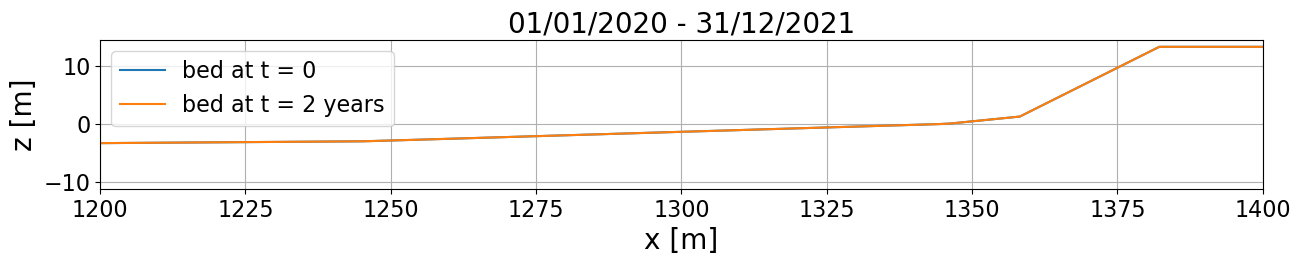

In [21]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr0, zgr0, label='bed at t = 0')
ax.plot(xgr_end, zgr_end, label='bed at t = 2 years')

ax.set_xlabel("x [m]")
ax.set_ylabel("z [m]")

ax.legend()
ax.grid()

ax.set_aspect("equal")

ax.set_xlim((1200, 1400))

ax.set_title("01/01/2020 - 31/12/2021")

Text(0.5, 1.0, '01/01/2020 - 31/12/2021')

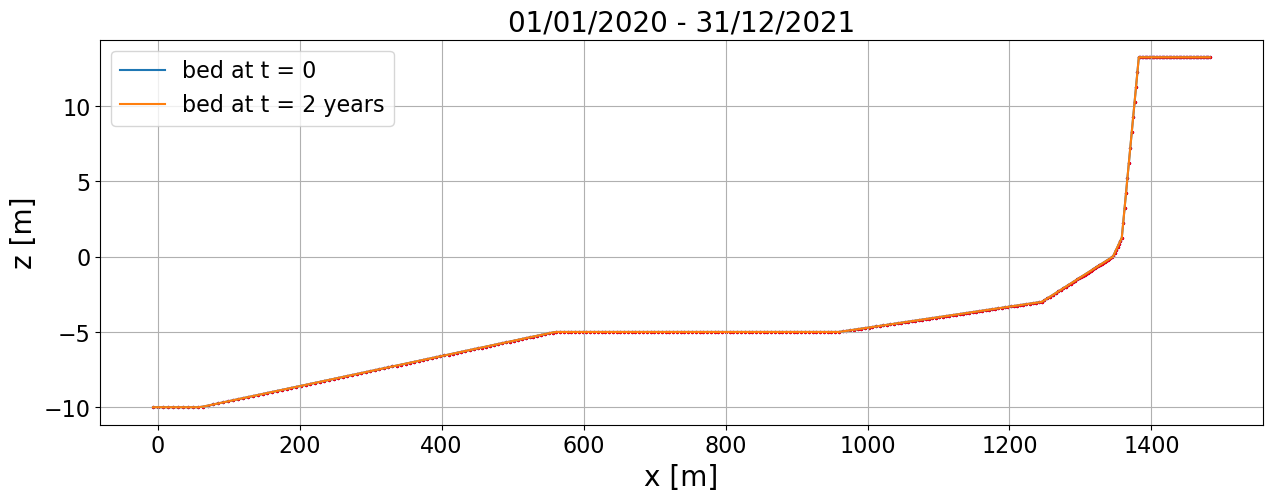

In [22]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr0, zgr0, label='bed at t = 0')
ax.plot(xgr_end, zgr_end, label='bed at t = 2 years')

ax.scatter(xgr0, zgr0, s=2, color='b')
ax.scatter(xgr_end, zgr_end, s=2, color='r')

ax.set_xlabel("x [m]")
ax.set_ylabel("z [m]")

ax.legend()
ax.grid()

ax.set_title("01/01/2020 - 31/12/2021")

In [23]:
thaw_depth0 = test0_results.get_var_timestep("thaw_depth", 0)[RUNID]

thaw_depth_summer = test0_results.get_var_timestep("thaw_depth", 6000)[RUNID]
xgr_summer = test0_results.get_var_timestep("xgr", 6000)[RUNID]
zgr_summer = test0_results.get_var_timestep("zgr", 6000)[RUNID]

FileNotFoundError: [Errno 2] No such file or directory: 'p:\\11210070-usgscoop-202324-arcticxb\\runs\\val0\\6000\\thaw_depth.txt'

Text(0.5, 1.0, 'thaw interface (t=0)')

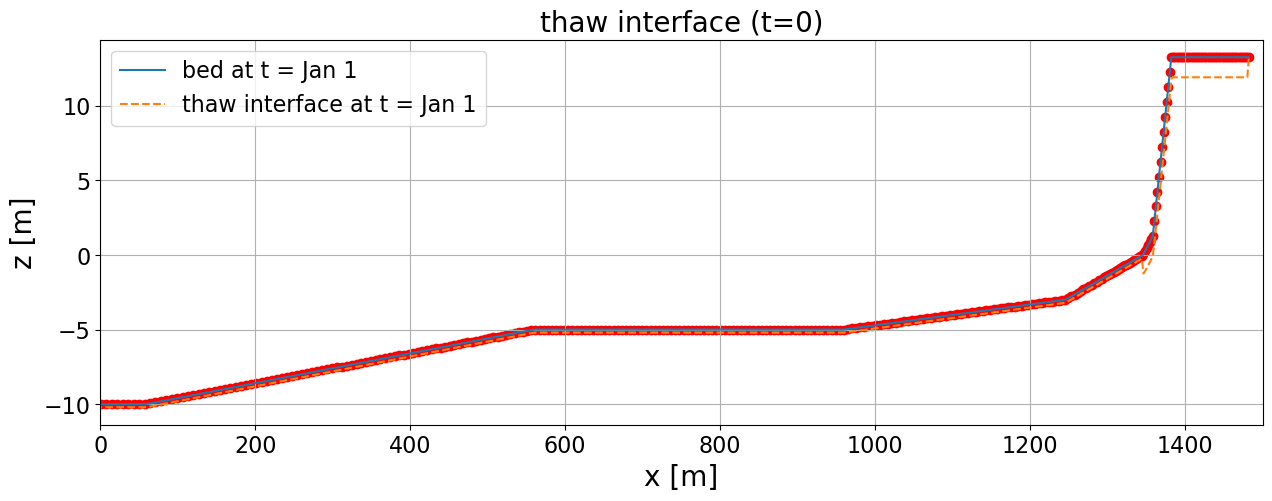

In [25]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr0, zgr0, label='bed at t = Jan 1')
ax.scatter(xgr0, zgr0, color='r')
ax.plot(xgr0, zgr0 - thaw_depth0, label='thaw interface at t = Jan 1', linestyle='--')

ax.set_xlabel("x [m]")
ax.set_ylabel("z [m]")

ax.legend()
ax.grid()

ax.set_xlim((0, 1500))

ax.set_title("thaw interface (t=0)")

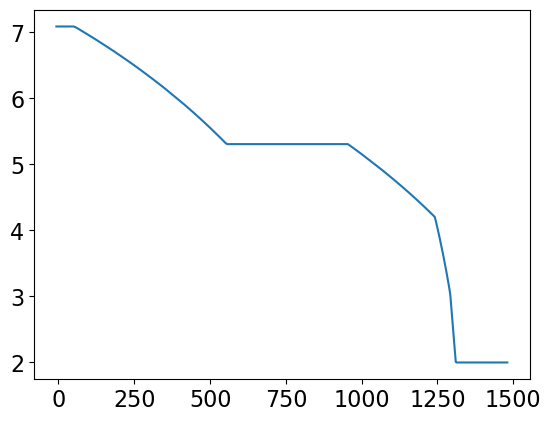

In [26]:
plt.plot(xgr0[:-1], xgr0[1:]-xgr0[:-1])

NameError: name 'xgr_summer' is not defined

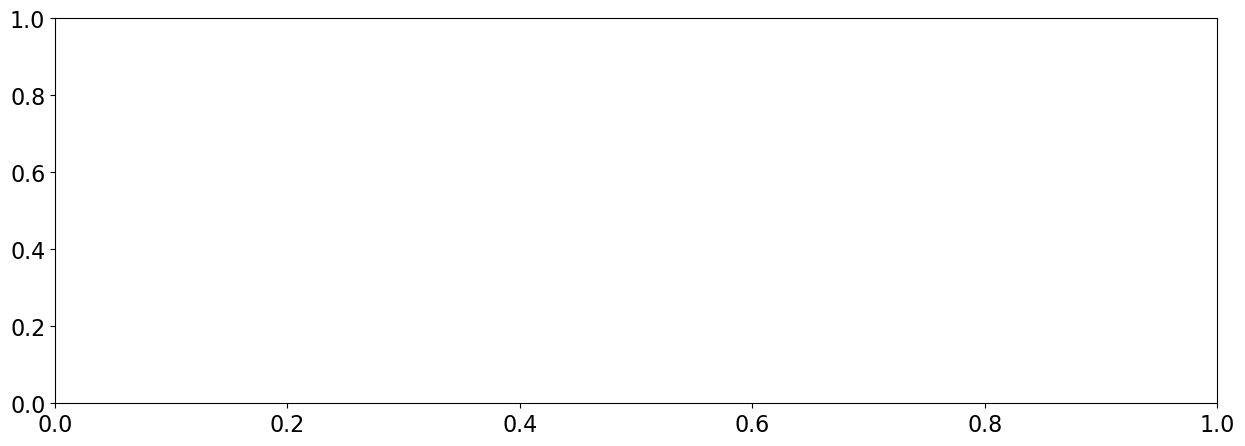

In [27]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr_summer, zgr_summer, label='bed at t = Sept 7')
ax.plot(xgr_summer, zgr_summer - thaw_depth_summer, label='thaw interface at t = Sept 7', linestyle='--')

ax.set_xlabel("x [m]")
ax.set_ylabel("z [m]")

ax.legend()
ax.grid()

ax.set_xlim((0, 1500))

ax.set_title("thaw interface (t=6000)")

In [28]:
t_output = np.array(test0_results.timestep_output_ids)

xgr_len = []
xgr_min = []

for t in t_output:
    
    xgr = test0_results.get_var_timestep('xgr', t)[RUNID]
    
    xgr_len.append(len(xgr))
    xgr_min.append(np.min(xgr))


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_53984\3426872591.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


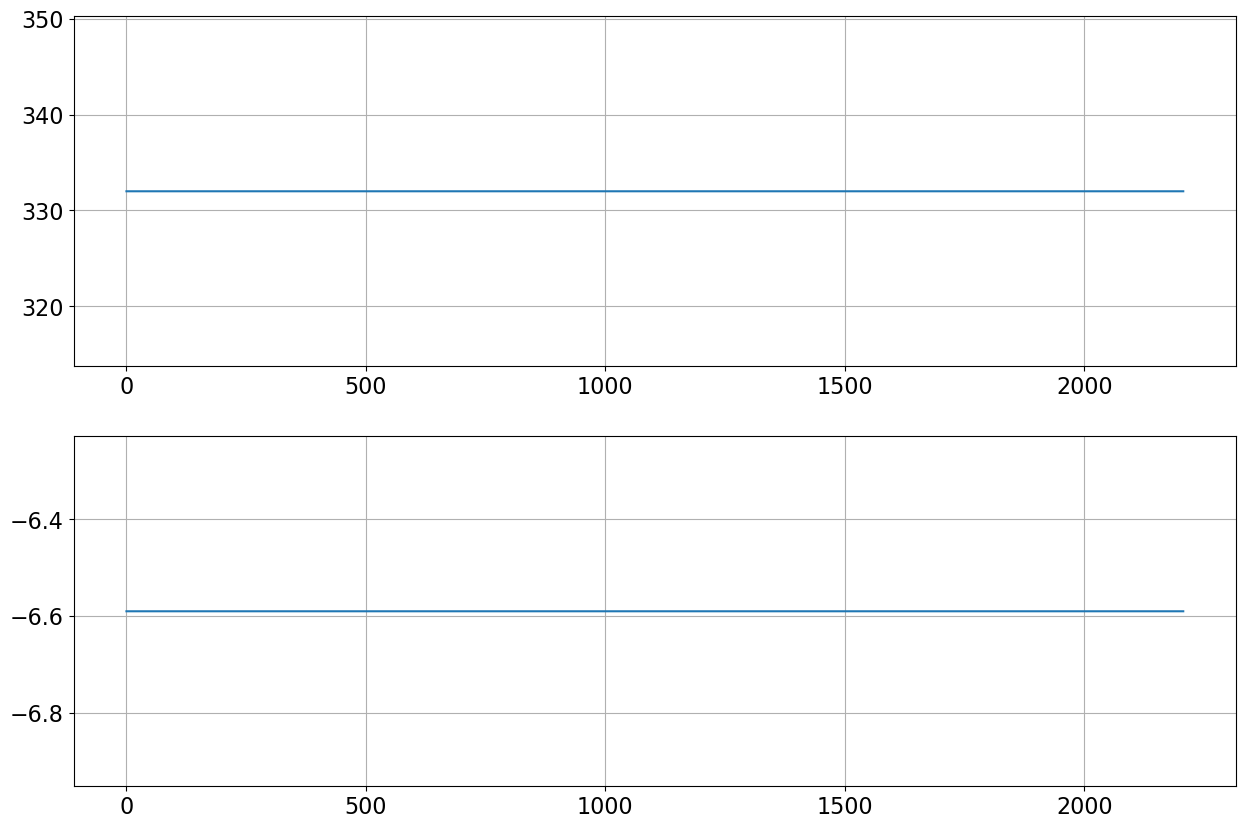

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

axs[0].plot(t_output, xgr_len)
axs[1].plot(t_output, xgr_min)

axs[0].grid()
axs[1].grid()

fig.show()

In [30]:
%matplotlib inline

In [31]:
from matplotlib import colormaps

cmap = colormaps["plasma"]

colors = cmap(np.linspace(0, 1, len(test0_results.timestep_output_ids)))

In [32]:
from datetime import datetime

i = 1.5958944e+18

print(datetime.fromtimestamp(i * 10**-9))

2020-07-28 02:00:00


[   0    1    2 ... 2205 2206 2207]
0


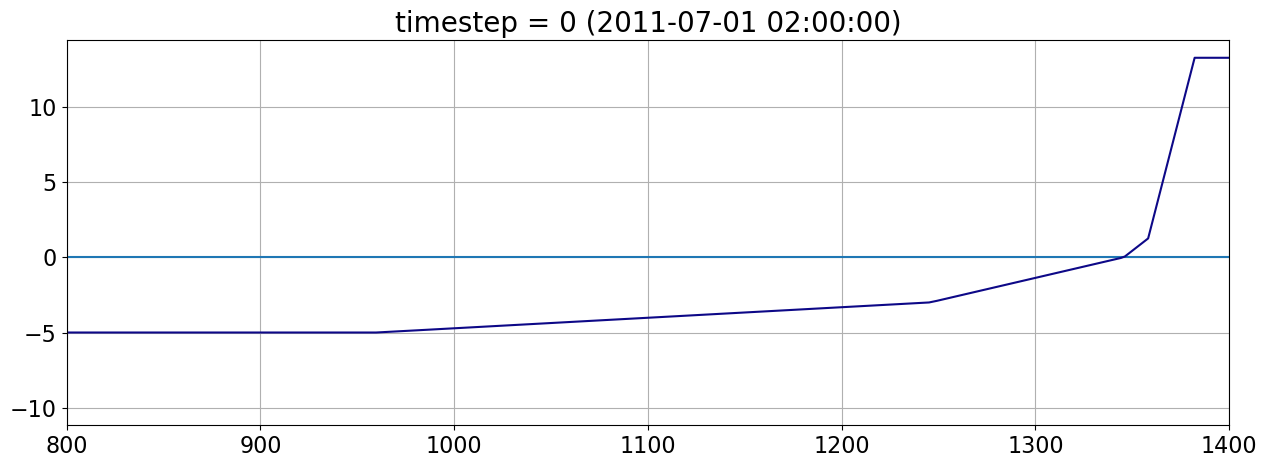

In [35]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(15,5))

lines = []

wl_line, = ax.plot((0, 1500), (0,0), color='C0')

ax.grid()


def animation_function(i):
    
    for l in lines:
        l.set(alpha=0.3)
        
    output_id = animation_timesteps[i]
    timestamp = datetime.fromtimestamp(test0_results.timestamps[np.where(output_id==test0_results.timestep_ids)][0] * 10**-9)
        
    print(output_id)
    # print(timestamp)
        
    ax.set_title(f'timestep = {output_id} ({timestamp})')
    
    xgr = test0_results.get_var_timestep("xgr", output_id)[RUNID]
    zgr = test0_results.get_var_timestep("zgr", output_id)[RUNID]
    
    wl = test0_results.get_var_timestep("storm_surge", output_id)[RUNID]
    

    line, = ax.plot(xgr, zgr, color=colors[i])
    lines.append(line)

    wl_line.set_ydata([wl, wl])
    
    ax.set_xlim((800, 1400))


    

# 5000 - 8000 & 14500 - 16500
# mask = (test0_results.timestep_output_ids > 5000) * (test0_results.timestep_output_ids < 8000) + \
#     (test0_results.timestep_output_ids > 14500) * (test0_results.timestep_output_ids < 16500)

# animation_timesteps = test0_results.timestep_output_ids[np.nonzero(mask)]

animation_timesteps = test0_results.timestep_output_ids

print(animation_timesteps)

cmap = colormaps["plasma"]

colors = cmap(np.linspace(0, 1, len(animation_timesteps)))
        
animation = FuncAnimation(fig, animation_function, frames=range(len(animation_timesteps)))
# animation = FuncAnimation(fig, animation_function, frames=range(len(test0_results.timestep_output_ids[:20])))

In [36]:
animation.save(f"results/{RUNID}.mp4", writer='ffmpeg', fps=5)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


[   0    1    2 ... 2205 2206 2207]
0


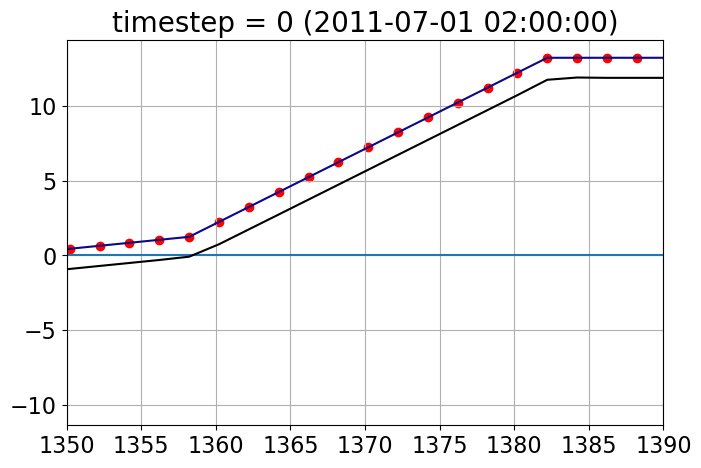

In [37]:
fig, ax = plt.subplots(figsize=(15,5))

lines = []

wl_line, = ax.plot((0, 1500), (0,0), color='C0')


xgr = test0_results.get_var_timestep("xgr", animation_timesteps[0])[RUNID]
zgr = test0_results.get_var_timestep("zgr", animation_timesteps[0])[RUNID]

thaw_depth = test0_results.get_var_timestep("thaw_depth", animation_timesteps[0])[RUNID]

td_line, = ax.plot(xgr, zgr - thaw_depth, color='k')

points = ax.scatter(xgr0, zgr0, color='r')

ax.grid()


def animation_function(i):
    
    for l in lines:
        l.set(alpha=0.3)
        
    output_id = animation_timesteps[i]
    timestamp = datetime.fromtimestamp(test0_results.timestamps[np.where(output_id==test0_results.timestep_ids)][0] * 10**-9)
        
    print(output_id)
    # print(timestamp)
        
    ax.set_title(f'timestep = {output_id} ({timestamp})')
    
    xgr = test0_results.get_var_timestep("xgr", output_id)[RUNID]
    zgr = test0_results.get_var_timestep("zgr", output_id)[RUNID]
    
    thaw_depth = test0_results.get_var_timestep("thaw_depth", output_id)[RUNID]
    
    wl = test0_results.get_var_timestep("storm_surge", output_id)[RUNID]
    

    line, = ax.plot(xgr, zgr, color=colors[i])
    lines.append(line)
    
    points.set_offsets(np.column_stack((xgr, zgr)))

    wl_line.set_ydata([wl, wl])
    td_line.set_xdata(xgr)
    td_line.set_ydata(zgr - thaw_depth)
    
    ax.set_xlim((1350, 1390))
    ax.set_aspect('equal')


    

# 5000 - 8000 & 14500 - 16500
# mask = (test0_results.timestep_output_ids > 5000) * (test0_results.timestep_output_ids < 8000) + \
#     (test0_results.timestep_output_ids > 14500) * (test0_results.timestep_output_ids < 16500)

# animation_timesteps = test0_results.timestep_output_ids[np.nonzero(mask)]



print(animation_timesteps)

cmap = colormaps["plasma"]

colors = cmap(np.linspace(0, 1, len(animation_timesteps)))
        
animation = FuncAnimation(fig, animation_function, frames=range(len(animation_timesteps)))
# animation = FuncAnimation(fig, animation_function, frames=range(len(test0_results.timestep_output_ids[:20])))

In [38]:
animation.save(f"results/{RUNID}_zoom.mp4", writer='ffmpeg', fps=5)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


The thaw depth seems a bit off. Let's look at the forcing. Probably an animation of subplots, including: bathymetry, thaw depth, total & latent & convective & longwave & shortwave (let's just do that for now).

[   0    1    2 ... 2205 2206 2207]
0


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_53984\2400786935.py:85: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  long_wave_radiation_flux_line.set_data(xgr, long_wave_radiation_flux)
C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_53984\2400786935.py:87: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  latent_heat_flux_line.set_data(xgr, latent_heat_flux)


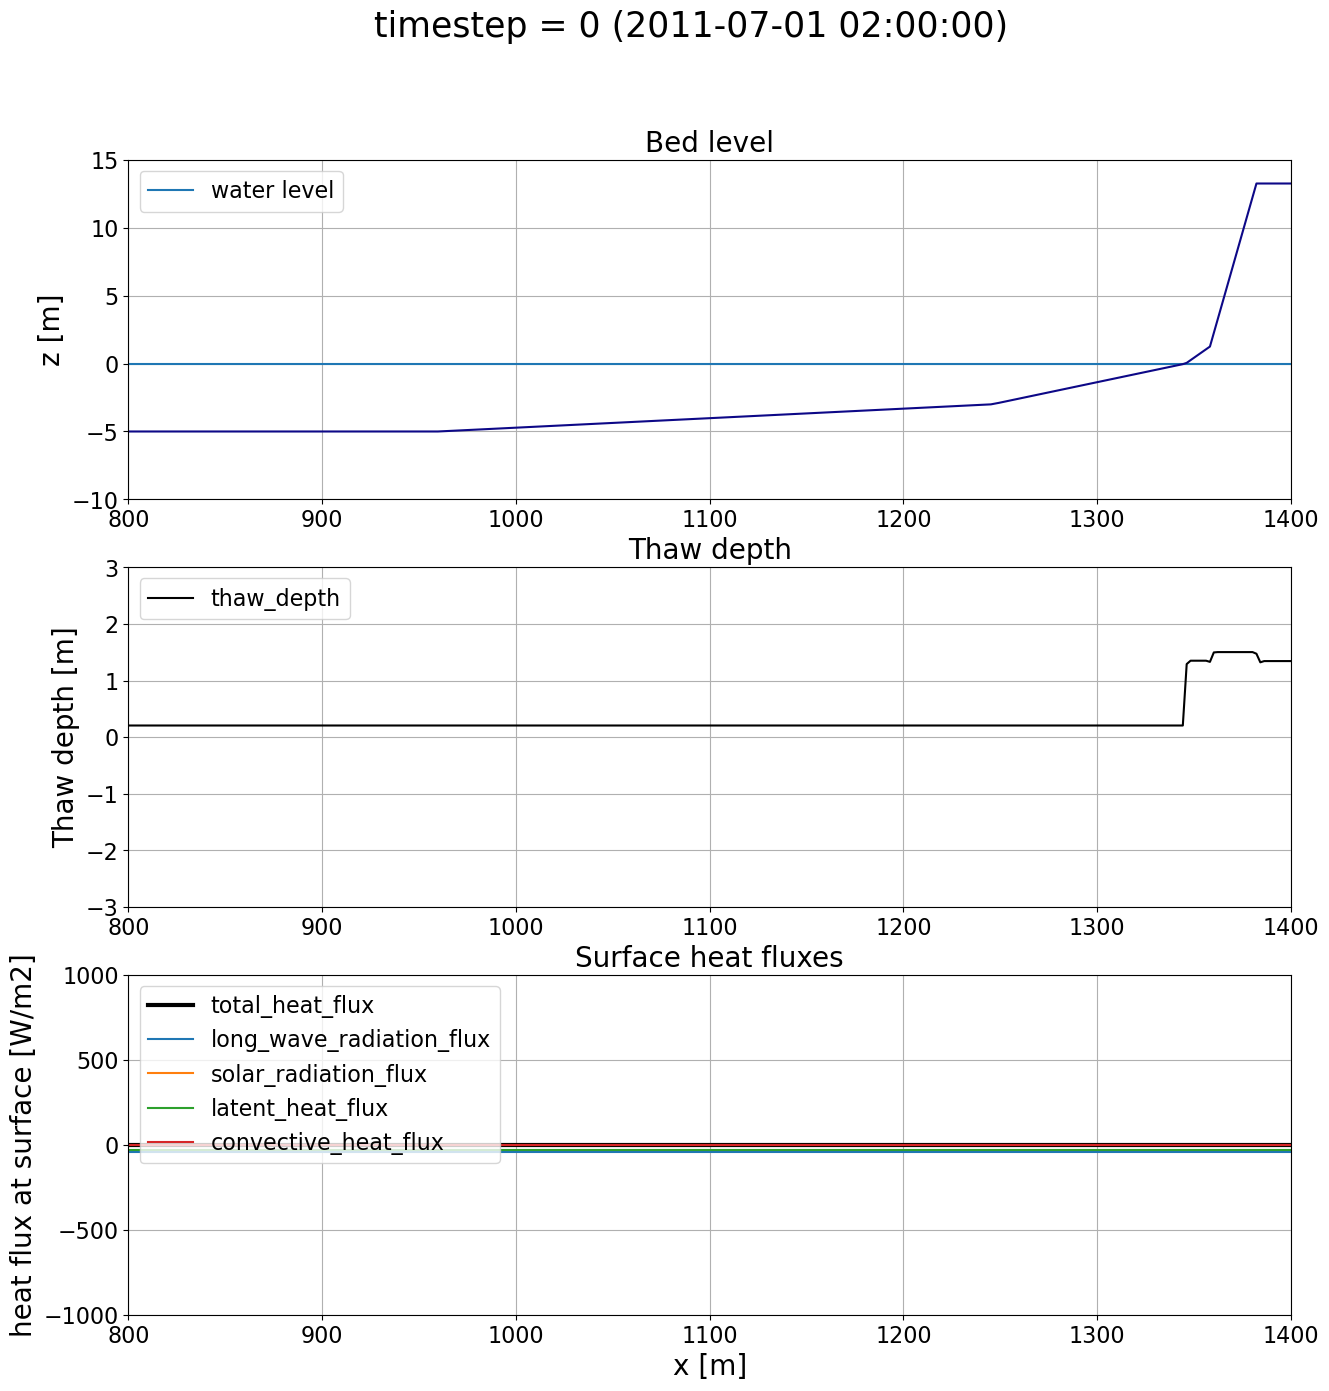

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(15,15))

lines = []

wl_line, = axs[0].plot((0, 1500), (0,0), color='C0', label='water level')

axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_xlim((800, 1400))
axs[1].set_xlim((800, 1400))
axs[2].set_xlim((800, 1400))

axs[0].set_ylim((-10, 15))
axs[1].set_ylim((-3, 3))
axs[2].set_ylim((-1000, 1000))

axs[0].set_title(("Bed level"))
axs[1].set_title(("Thaw depth"))
axs[2].set_title(("Surface heat fluxes"))

axs[0].set_ylabel('z [m]')
axs[1].set_ylabel('Thaw depth [m]')
axs[2].set_ylabel('heat flux at surface [W/m2]')

axs[2].set_xlabel('x [m]')


# create initial plot for thaw depth
thaw_depth_line, = axs[1].plot([],[],label='thaw_depth', color='k')

# create initial_plot for heat fluxes
total_heat_flux_line, = axs[2].plot([],[],label='total_heat_flux', color='k', linewidth=3)
long_wave_radiation_flux_line, = axs[2].plot([],[],label='long_wave_radiation_flux')
solar_radiation_flux_line, = axs[2].plot([],[],label='solar_radiation_flux')
latent_heat_flux_line, = axs[2].plot([],[],label='latent_heat_flux')
convective_heat_flux_line, = axs[2].plot([],[],label='convective_heat_flux')

axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')

def animation_function(i):
    
    # set alpha of old bathymetry lines
    for l in lines:
        l.set(alpha=0.3)
    
    # get current timestep id
    output_id = animation_timesteps[i]
    timestamp = datetime.fromtimestamp(test0_results.timestamps[np.where(output_id==test0_results.timestep_ids)][0] * 10**-9)
        
    print(output_id)
    
    # set current timestep id as figure title
    fig.suptitle(f'timestep = {output_id} ({timestamp})')
    
    # get necessary variables
    xgr = test0_results.get_var_timestep("xgr", output_id)[RUNID]
    zgr = test0_results.get_var_timestep("zgr", output_id)[RUNID]
    
    wl = test0_results.get_var_timestep("storm_surge", output_id)[RUNID]
    
    thaw_depth = test0_results.get_var_timestep("thaw_depth", output_id)[RUNID]
    
    total_heat_flux = test0_results.get_var_timestep("total_heat_flux", output_id)[RUNID]
    long_wave_radiation_flux = test0_results.get_var_timestep("long_wave_radiation_flux", output_id)[RUNID]
    solar_radiation_flux = test0_results.get_var_timestep("solar_radiation_flux", output_id)[RUNID]
    latent_heat_flux = test0_results.get_var_timestep("latent_heat_flux", output_id)[RUNID]
    convective_heat_flux = test0_results.get_var_timestep("convective_heat_flux", output_id)[RUNID]
        
    # plot bathymetry (in plot 0)
    line, = axs[0].plot(xgr, zgr, color=colors[i])
    lines.append(line)

    # plot water level (in plot 0)
    wl_line.set_ydata([wl, wl])
    
    # plot thaw depth (in plot 1)
    thaw_depth_line.set_data(xgr, thaw_depth)
    
    # plot surface heat fluxes (in plot 2)
    total_heat_flux_line.set_data(xgr, total_heat_flux)
    long_wave_radiation_flux_line.set_data(xgr, long_wave_radiation_flux)
    solar_radiation_flux_line.set_data(xgr, solar_radiation_flux)
    latent_heat_flux_line.set_data(xgr, latent_heat_flux)
    convective_heat_flux_line.set_data(xgr, convective_heat_flux)



# 5000 - 8000 & 14500 - 16500
# mask = (test0_results.timestep_output_ids > 5000) * (test0_results.timestep_output_ids < 8000) + \
#     (test0_results.timestep_output_ids > 14500) * (test0_results.timestep_output_ids < 16500)

# animation_timesteps = test0_results.timestep_output_ids[np.nonzero(mask)]

print(animation_timesteps)

cmap = colormaps["plasma"]

colors = cmap(np.linspace(0, 1, len(animation_timesteps)))
        
animation_heat_flux = FuncAnimation(fig, animation_function, frames=range(len(animation_timesteps)))
# animation = FuncAnimation(fig, animation_function, frames=range(len(test0_results.timestep_output_ids[:20])))

In [40]:
animation_heat_flux.save(f"results/{RUNID}_heat_flux.mp4", writer='ffmpeg', fps=5)

0
0


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_53984\2400786935.py:85: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  long_wave_radiation_flux_line.set_data(xgr, long_wave_radiation_flux)
C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_53984\2400786935.py:87: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  latent_heat_flux_line.set_data(xgr, latent_heat_flux)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262


KeyboardInterrupt: 

5016


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_73508\1789213265.py:106: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  long_wave_radiation_flux_line.set_data(xgr, long_wave_radiation_flux)
C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_73508\1789213265.py:108: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  latent_heat_flux_line.set_data(xgr, latent_heat_flux)


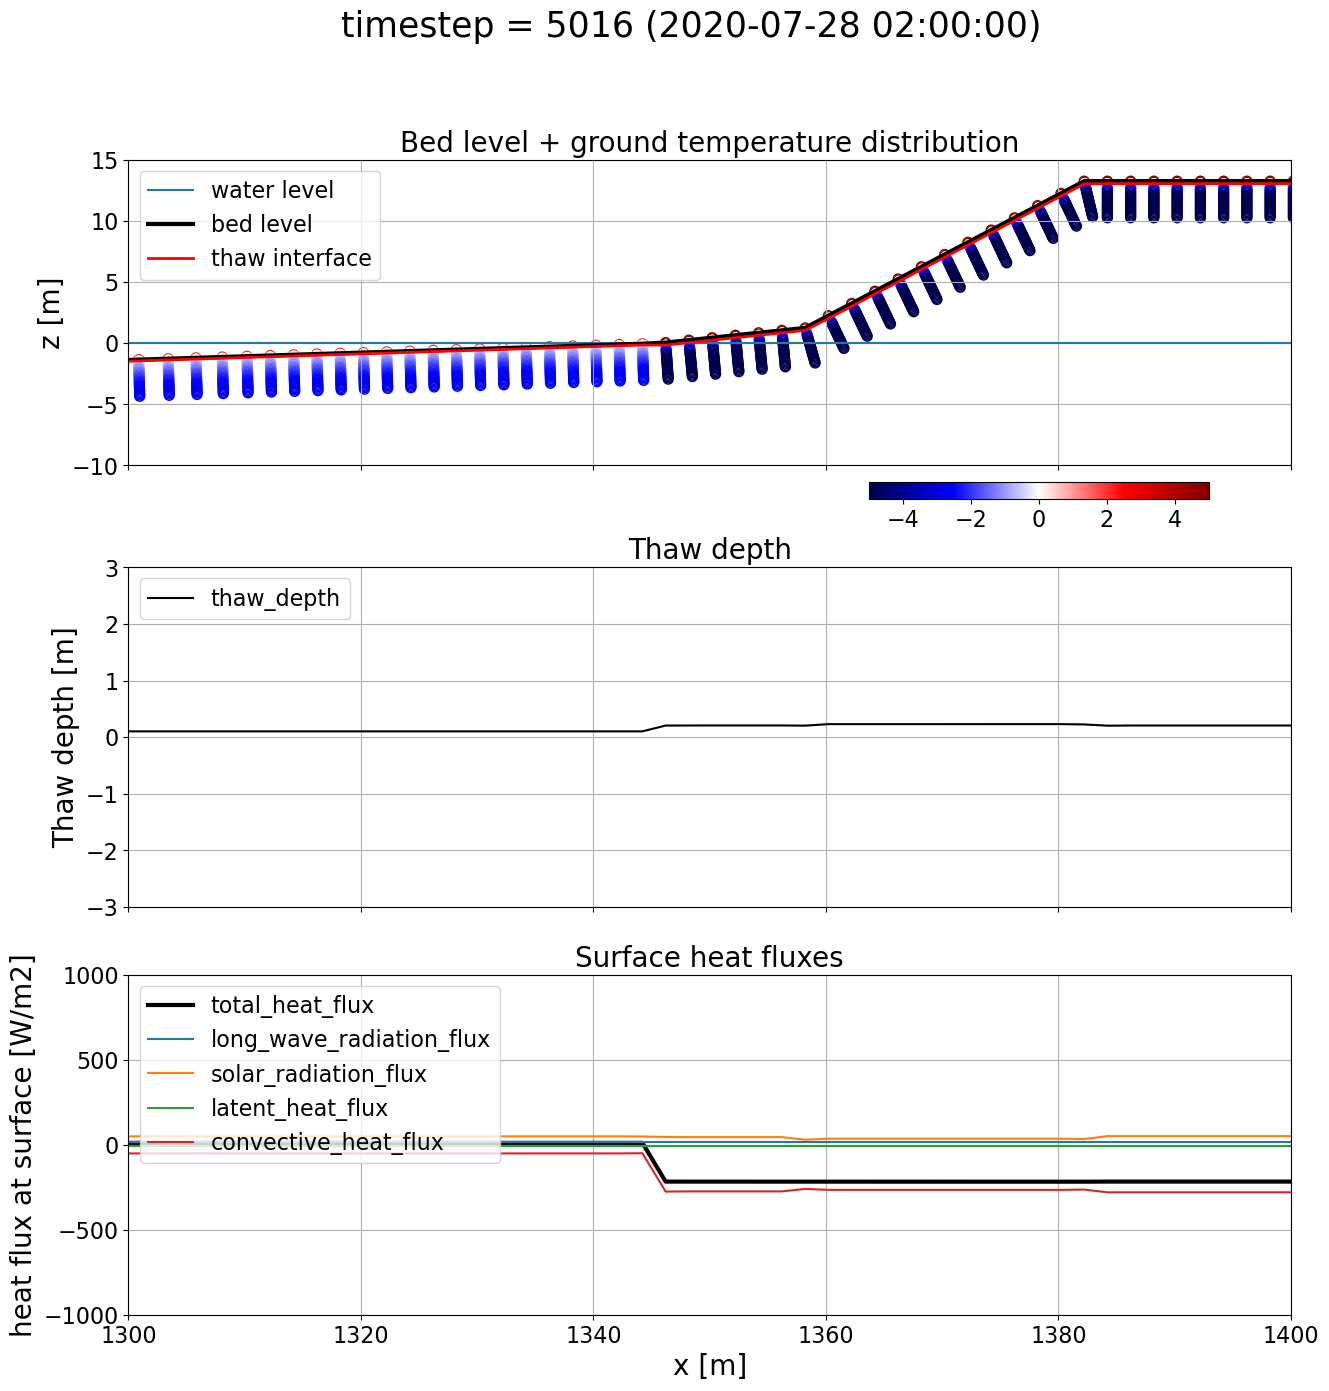

In [ ]:

vmin = -5  # degrees Celcius
vmax = 5

xmin = 1300

norm = Normalize(vmin=vmin, vmax=vmax)

fig, axs = plt.subplots(3, 1, figsize=(15,15), sharex=True)

sm = ScalarMappable(norm, cmap='seismic')

temp_scatter = axs[0].scatter([], [], c=[], cmap='seismic', norm=norm, s=50)

plt.colorbar(temp_scatter, ax=axs[0], orientation='horizontal', fraction=0.05, pad=0.05, anchor=(0.9, 1))

wl_line, = axs[0].plot((0, 1500), (0,0), color='C0', label='water level')
bathy_line, = axs[0].plot([],[], color='k', label='bed level', linewidth=3)
thaw_line, = axs[0].plot([],[], color='r', label='thaw interface', linewidth=2)

axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_xlim((xmin, 1400))
axs[1].set_xlim((xmin, 1400))
axs[2].set_xlim((xmin, 1400))

axs[0].set_ylim((-10, 15))
axs[1].set_ylim((-3, 3))
axs[2].set_ylim((-1000, 1000))

axs[0].set_title(("Bed level + ground temperature distribution"))
axs[1].set_title(("Thaw depth"))
axs[2].set_title(("Surface heat fluxes"))

axs[0].set_ylabel('z [m]')
axs[1].set_ylabel('Thaw depth [m]')
axs[2].set_ylabel('heat flux at surface [W/m2]')

axs[2].set_xlabel('x [m]')

# create initial plot for thaw depth
thaw_depth_line, = axs[1].plot([],[],label='thaw_depth', color='k')

# create initial_plot for heat fluxes
total_heat_flux_line, = axs[2].plot([],[],label='total_heat_flux', color='k', linewidth=3)
long_wave_radiation_flux_line, = axs[2].plot([],[],label='long_wave_radiation_flux')
solar_radiation_flux_line, = axs[2].plot([],[],label='solar_radiation_flux')
latent_heat_flux_line, = axs[2].plot([],[],label='latent_heat_flux')
convective_heat_flux_line, = axs[2].plot([],[],label='convective_heat_flux')

axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')

def animation_function(i):
    # get current timestep id
    output_id = animation_timesteps[i]
    timestamp = datetime.fromtimestamp(test0_results.timestamps[np.where(output_id==test0_results.timestep_ids)][0] * 10**-9)
        
    print(output_id)
    
    # set current timestep id as figure title
    fig.suptitle(f'timestep = {output_id} ({timestamp})')
    
    # get necessary variables
    xgr = test0_results.get_var_timestep("xgr", output_id)[RUNID]
    zgr = test0_results.get_var_timestep("zgr", output_id)[RUNID]
    
    wl = test0_results.get_var_timestep("storm_surge", output_id)[RUNID]
    
    thaw_depth = test0_results.get_var_timestep("thaw_depth", output_id)[RUNID]
    
    total_heat_flux = test0_results.get_var_timestep("total_heat_flux", output_id)[RUNID]
    long_wave_radiation_flux = test0_results.get_var_timestep("long_wave_radiation_flux", output_id)[RUNID]
    solar_radiation_flux = test0_results.get_var_timestep("solar_radiation_flux", output_id)[RUNID]
    latent_heat_flux = test0_results.get_var_timestep("latent_heat_flux", output_id)[RUNID]
    convective_heat_flux = test0_results.get_var_timestep("convective_heat_flux", output_id)[RUNID]
    
    abs_xgr = test0_results.get_var_timestep("abs_xgr", output_id)[RUNID]
    abs_zgr = test0_results.get_var_timestep("abs_zgr", output_id)[RUNID]
    temp = test0_results.get_var_timestep("ground_temperature_distribution", output_id)[RUNID] - 273.15
    temp_norm = sm.to_rgba(temp)

    # plot bathymetry (in plot 0)
    bathy_line.set_data(xgr, zgr)
    thaw_line.set_data(xgr, zgr - thaw_depth)

    # plot water level (in plot 0)
    wl_line.set_ydata([wl, wl])
    
    # plot thaw interface (in plot 0)
    thaw_line.set_data(xgr, zgr - thaw_depth)
    
    # plot temperature (in plot 0)
    temp_scatter.set_offsets(np.column_stack((abs_xgr, abs_zgr)))
    temp_scatter.set_color(temp_norm)
    
    # plot thaw depth (in plot 1)
    thaw_depth_line.set_data(xgr, thaw_depth)
    
    # plot surface heat fluxes (in plot 2)
    total_heat_flux_line.set_data(xgr, total_heat_flux)
    long_wave_radiation_flux_line.set_data(xgr, long_wave_radiation_flux)
    solar_radiation_flux_line.set_data(xgr, solar_radiation_flux)
    latent_heat_flux_line.set_data(xgr, latent_heat_flux)
    convective_heat_flux_line.set_data(xgr, convective_heat_flux)



# 5000 - 8000 & 14500 - 16500
# mask = (test0_results.timestep_output_ids > 5000) * (test0_results.timestep_output_ids < 8000) + \
#     (test0_results.timestep_output_ids > 14500) * (test0_results.timestep_output_ids < 16500)

# animation_timesteps = test0_results.timestep_output_ids[np.nonzero(mask)]
        
animation_temperature = FuncAnimation(fig, animation_function, frames=range(len(animation_timesteps)))
# animation_temperature = FuncAnimation(fig, animation_function, frames=range(len(test0_results.timestep_output_ids[:20])))

In [ ]:
animation_temperature.save(f"results/{RUNID}_temperature.mp4", writer='ffmpeg', fps=5)

5016


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_73508\1789213265.py:106: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  long_wave_radiation_flux_line.set_data(xgr, long_wave_radiation_flux)
C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_73508\1789213265.py:108: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  latent_heat_flux_line.set_data(xgr, latent_heat_flux)


5016
5040
5064
5088
5112
5136
5160
5184
5208
5232
5256
5280
5304
5328
5352
5376
5400
5424
5448
5472
5496
5520
5544
5568
5592
5616
5640
5664
5688
5712
5736
5760
5784
5808
5832
5856
5880
5904
5928
5952
5976
6000
6024
6048
6072
6096
6120
6144
6168
6192
6216
6240
6264
6288
6312
6336
6360
6384
6408
6432
6456
6480
6504
6528
6552
6576
6600
6624
6648
6672
6696
6720
6744
6768
6792
6816
6840
6864
6888
6912
6936
6960
6984
7008
7032
7056
7080
7104
7128
7152
7176
7200
7224
7248
7272
7296
7320
7344
7368
7392
7416
7440
7464
7488
7512
7536
7560
7584
7608
7632
7656
7680
7704
7728
7752
7776
7800
7824
7848
7872
7896
7920
7944
7968
7992
14520
14544
14568
14592
14616
14640
14664
14688
14712
14736
14760
14784
14808
14832
14856
14880
14904
14928
14952
14976
15000
15024
15048
15072
15096
15120
15144
15168
15192
15216
15240
15264
15288
15312
15336
15360
15384
15408
15432
15456
15480
15504
15528
15552
15576
15600
15624
15648
15672
15696
15720
15744
15768
15792
15816
15840
15864
15888
15912
15936
15960
15984
160